**CS89 Project: Is Space-Time-Audio Attention All You Need**



**1. Load the pretrained TimeSformer**

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


**2. Install Necesseary TimeSformer Package Requirements**

In [ ]:
!pip install torchvision
!pip install 'git+https://github.com/facebookresearch/fvcore'
!pip install simplejson
!pip install einops
!pip install timm
!pip install psutil
!pip install scikit-learn
!pip install opencv-python
!pip install tensorboard
!pip install av

  Using cached nvidia_cuda_nvrtc_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (23.7 MB)
  Using cached nvidia_cuda_runtime_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (823 kB)
  Using cached nvidia_cuda_cupti_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (14.1 MB)
  Using cached nvidia_cudnn_cu12-8.9.2.26-py3-none-manylinux1_x86_64.whl (731.7 MB)
  Using cached nvidia_cublas_cu12-12.1.3.1-py3-none-manylinux1_x86_64.whl (410.6 MB)
  Using cached nvidia_cufft_cu12-11.0.2.54-py3-none-manylinux1_x86_64.whl (121.6 MB)
  Using cached nvidia_curand_cu12-10.3.2.106-py3-none-manylinux1_x86_64.whl (56.5 MB)
  Using cached nvidia_cusolver_cu12-11.4.5.107-py3-none-manylinux1_x86_64.whl (124.2 MB)
  Using cached nvidia_cusparse_cu12-12.1.0.106-py3-none-manylinux1_x86_64.whl (196.0 MB)
  Using cached nvidia_nccl_cu12-2.20.5-py3-none-manylinux2014_x86_64.whl (176.2 MB)
  Using cached nvidia_nvtx_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (99 kB)
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.3/21

**3. Clone TimeSformer from github**

In [ ]:
!git clone https://github.com/facebookresearch/TimeSformer
%cd TimeSformer
!python setup.py build develop


Cloning into 'TimeSformer'...
remote: Enumerating objects: 392, done.
remote: Counting objects: 100% (148/148), done.
remote: Compressing objects: 100% (74/74), done.
remote: Total 392 (delta 100), reused 74 (delta 74), pack-reused 244
Receiving objects: 100% (392/392), 336.91 KiB | 3.66 MiB/s, done.
Resolving deltas: 100% (176/176), done.
/content/TimeSformer
running build
running build_py
creating build
creating build/lib
creating build/lib/timesformer
copying timesformer/__init__.py -> build/lib/timesformer
creating build/lib/timesformer/visualization
copying timesformer/visualization/utils.py -> build/lib/timesformer/visualization
copying timesformer/visualization/tensorboard_vis.py -> build/lib/timesformer/visualization
copying timesformer/visualization/__init__.py -> build/lib/timesformer/visualization
creating build/lib/timesformer/datasets
copying timesformer/datasets/utils.py -> build/lib/timesformer/datasets
copying timesformer/datasets/video_container.py -> build/lib/timesfo

**4. Verify TimeSformer Installation:**

Notes:

1. The TimeSformer code uses an earlier version of pytorch so before any code is run, two things must be updated.
2. In resnet_helper.py, replace ```from torch.nn.modules.linear import _LinearWithBias```

 with ```from torch.nn import Linear as _LinearWithBias ```
3. In vit_utils.py, replace ```from torch._six import container_abcs``` with ```from collections import abc as container_abcs```


In [ ]:
from timesformer.models.vit import TimeSformer

**5. Now import the pretrained TimeSformer with the correct parameters**

In [ ]:
import torch

pretrained_model_path = '/content/drive/MyDrive/Colab Notebooks/TimeSformer_divST_64x32_224_HowTo100M.pyth'

model = TimeSformer(img_size=448,
                    num_classes=400,
                    num_frames=64,
                    attention_type='divided_space_time',
                    pretrained_model=pretrained_model_path)

# Move the model to GPU
model = model.cuda()


**6. Now that the TimeSformer has been processed, we need to load the audio transformer**

1. The Audio transformer used in this section is the AST: or the Audio Spectrogram Transformer
2. Detailed architecture specs can be found at the following link:https://github.com/YuanGongND/ast?tab=readme-ov-file


**7. Clone the audio transformer from the repository**

In [ ]:
!git clone https://github.com/YuanGongND/ast.git
%cd ast/

Cloning into 'ast'...
remote: Enumerating objects: 649, done.
remote: Counting objects: 100% (209/209), done.
remote: Compressing objects: 100% (50/50), done.
remote: Total 649 (delta 172), reused 159 (delta 159), pack-reused 440
Receiving objects: 100% (649/649), 2.41 MiB | 13.84 MiB/s, done.
Resolving deltas: 100% (360/360), done.
/content/TimeSformer/ast


**8. Download all the necessary requirements**

1. Like the TimeSformer, we need to update some of requirements and import statements to accord with our current python environment. Go to /content/TimeSformer/ast/requirements.txt and replace what is there with this code:
```
llvmlite>=0.38.0
matplotlib>=3.4.2
numba>=0.55.0
numpy>=1.20.3
scikit-learn>=0.24.2
scipy>=1.6.3
timm==0.4.5
torch>=1.8.1
torchaudio>=0.8.1
torchvision>=0.10.0
wget>=3.2
zipp>=3.4.1
```

In [ ]:
!pip install -r requirements.txt

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 287.4/287.4 kB 2.4 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for wget: filename=wget-3.2-py3-none-any.whl size=9656 sha256=9532b738b329a4c896d082f4d56e00a7b91441d436aa7a32bed29069528f6533
  Stored in directory: /root/.cache/pip/wheels/8b/f1/7f/5c94f0a7a505ca1c81cd1d9208ae2064675d97582078e6c769
Successfully built wget
  Attempting uninstall: timm
    Found existing installation: timm 1.0.3
    Uninstalling timm-1.0.3:
      Successfully uninstalled timm-1.0.3


**9. Initialize the AST trained on audioset with weight normalization, 10 tstride, and 10 fstride**

In [ ]:
import os, sys

ast_repo_path = '/content/TimeSformer/ast/src'
sys.path.append(ast_repo_path)

import models
import torch

# audioset input sequence length is 1024
pretrained_mdl_path = '/content/drive/MyDrive/Colab Notebooks/audioset_10_10_0.4593.pth'
# get the frequency and time stride of the pretrained model from its name
fstride, tstride = int(pretrained_mdl_path.split('/')[-1].split('_')[1]), int(pretrained_mdl_path.split('/')[-1].split('_')[2].split('.')[0])
# The input of audioset pretrained model is 1024 frames.
input_tdim = 1024

# initialize an AST model
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
sd = torch.load(pretrained_mdl_path, map_location=device)
audio_model = models.ASTModel(input_tdim=input_tdim, fstride=fstride, tstride=tstride)
audio_model = torch.nn.DataParallel(audio_model)
audio_model.load_state_dict(sd, strict=False)


---------------AST Model Summary---------------
ImageNet pretraining: True, AudioSet pretraining: False


Downloading: "https://dl.fbaipublicfiles.com/deit/deit_base_distilled_patch16_384-d0272ac0.pth" to ../../pretrained_models/hub/checkpoints/deit_base_distilled_patch16_384-d0272ac0.pth


frequncey stride=10, time stride=10
number of patches=1212


<All keys matched successfully>

**10. Now that we have uploaded the pretrained timeSformer and the AST, we need to modify their architecture, remove the last fully connected layers, freeze the weights in the previous layers, and fuse them using late fusion**

**11. Let's remove the fully connected layers from both transformers**

In [ ]:
from torch.nn import Identity
print(model)
print(audio_model)


TimeSformer(
  (model): VisionTransformer(
    (dropout): Dropout(p=0.0, inplace=False)
    (patch_embed): PatchEmbed(
      (proj): Conv2d(3, 768, kernel_size=(16, 16), stride=(16, 16))
    )
    (pos_drop): Dropout(p=0.0, inplace=False)
    (time_drop): Dropout(p=0.0, inplace=False)
    (blocks): ModuleList(
      (0): Block(
        (norm1): LayerNorm((768,), eps=1e-06, elementwise_affine=True)
        (attn): Attention(
          (qkv): Linear(in_features=768, out_features=2304, bias=True)
          (proj): Linear(in_features=768, out_features=768, bias=True)
          (proj_drop): Dropout(p=0.0, inplace=False)
          (attn_drop): Dropout(p=0.0, inplace=False)
        )
        (temporal_norm1): LayerNorm((768,), eps=1e-06, elementwise_affine=True)
        (temporal_attn): Attention(
          (qkv): Linear(in_features=768, out_features=2304, bias=True)
          (proj): Linear(in_features=768, out_features=768, bias=True)
          (proj_drop): Dropout(p=0.0, inplace=False)
   

In [ ]:
from torch.nn import Identity
# Remove TimeSformer's only linear layer
model.model.head = Identity()

# Remove AST's three linear layers demonstrated by above print statement.
audio_model.module.v.head = Identity()
audio_model.module.v.head_dist = Identity()
audio_model.module.mlp_head = Identity()

**12. Test whether the two models are outputting the correct dimensions without the fully connected layers**

In [ ]:
# Get the device from one of the model's parameters
device = next(model.parameters()).device

# Test the TimeSformer
timeSformer_test_input = torch.randn(1, 3, 64, 448, 448).to(device)

# Forward pass to check output
with torch.no_grad():
    t_output = model(timeSformer_test_input)
    print("TimeSformer shape after removing the fully connected layer:", t_output.shape)

# Change the device for the AST
device = next(audio_model.parameters()).device

# Test spectrogram with models inputs specified in AST README
audio_test_input = torch.randn(1, 1024, 128)

# Forward pass to check the model output
with torch.no_grad():
    a_output = audio_model(audio_test_input)
    print("AST shape after removing the last three fully connected laters:", a_output.shape)

if t_output.shape == a_output.shape:
  print("The shape of the TimeSformer and AST are the same.")
else:
  print("The shape of the TimeSformer and AST are different.")


TimeSformer shape after removing the fully connected layer: torch.Size([1, 768])
AST shape after removing the last three fully connected laters: torch.Size([1, 768])
The shape of the TimeSformer and AST are the same.


**13. Now we need to freeze the weights of the two models before we join them by concatenating their feature vectors.**

In [ ]:
for param in model.parameters():
    param.requires_grad = False

for param in audio_model.module.parameters():
    param.requires_grad = False

**14. Now we need to define the fully connected layers that will lead to the classification.**

In [ ]:
import torch.nn as nn

class FC(nn.Module):
    def __init__(self, input_dim, num_classes):
        super(FC, self).__init__()
        self.fc1 = nn.Linear(input_dim, 1024)
        self.relu1 = nn.ReLU()
        self.dropout1 = nn.Dropout(0.5)
        self.fc2 = nn.Linear(1024, 512)
        self.relu2 = nn.ReLU()
        self.dropout2 = nn.Dropout(0.5)
        self.fc3 = nn.Linear(512, num_classes)

    def forward(self, x):
        x = self.relu1(self.fc1(x))
        x = self.dropout1(x)
        x = self.relu2(self.fc2(x))
        x = self.dropout2(x)
        x = self.fc3(x)
        return x


**15. Now create the training dataset with the appropriate normalization which is required by the models.** The TimeSformer model used here processes 64 frames of videos with spatial resolution of 224x224. The AST works on spectrograms so the raw audio must be converted first to spectrogram form.

In [ ]:
# Install necessary libraries
!pip install torch torchvision torchaudio librosa ffmpeg-python

**16. Dataset: VGGSound: The following code installs relevant directories and then outlines the process for taking a dataset of videos and a corresponding csv file; and processing the data.**

In [ ]:
!pip install opencv-python
!pip install librosa
!pip install torchvision

In [ ]:
!rm -r /content/processed_data
!mkdir -p /content/processed_data
!mkdir -p /content/processed_data/train
!mkdir -p /content/processed_data/val
!mkdir -p /content/processed_data/test


rm: cannot remove '/content/processed_data': No such file or directory


Create a JSON file to store the labels and assign them to a given integer.

In [ ]:
import os
import pandas as pd
import json

# Define the paths
base_dir = '/content/drive/MyDrive/Colab Notebooks/VGGSound'
csv_path = '/content/drive/MyDrive/Colab Notebooks/vggsound.csv'

# Read the CSV file
data_file = pd.read_csv(csv_path, sep=',', header=None, names=['YouTube ID', 'start seconds', 'label', 'train/test split'])

# Convert 'start seconds' to integer and format it
data_file['start seconds'] = data_file['start seconds'].astype(int).map(lambda x: f"{x:06d}")

# List existing video files
existing_files = []
for split in ['train', 'val', 'test']:
    split_dir = os.path.join(base_dir, split)
    for file in os.listdir(split_dir):
        if file.endswith(".mp4"):
            existing_files.append(file.split(".")[0])  # Append the file name without extension

# Filter the DataFrame to only include existing files
data_file['file_id'] = data_file['YouTube ID'] + "_" + data_file['start seconds']
filtered_data_file = data_file[data_file['file_id'].isin(existing_files)]

# Create a label mapping
label_set = filtered_data_file['label'].unique()
label_mapping = {label: idx for idx, label in enumerate(sorted(label_set))}

# Save the label mapping to a file
label_mapping_path = '/content/processed_data/label_mapping.json'
with open(label_mapping_path, 'w') as f:
    json.dump(label_mapping, f)

print(f"Label mapping saved to {label_mapping_path}")


Label mapping saved to /content/processed_data/label_mapping.json


Process the data according the specifications in the TimeSformer and AST GitHub READMEs: https://github.com/facebookresearch/TimeSformer, and https://github.com/YuanGongND/ast

In [ ]:
import os
import cv2
import torch
import librosa
import pandas as pd
import numpy as np  # Ensure numpy is imported
from torchvision import transforms
from tqdm import tqdm
import json

# Define the paths
base_dir = '/content/drive/MyDrive/Colab Notebooks/VGGSound'
csv_path = '/content/drive/MyDrive/Colab Notebooks/vggsound.csv'
label_mapping_path = '/content/processed_data/label_mapping.json'

# Load the label mapping
with open(label_mapping_path, 'r') as f:
    label_mapping = json.load(f)

# Read the CSV file
data_file = pd.read_csv(csv_path, sep=',', header=None, names=['YouTube ID', 'start seconds', 'label', 'train/test split'])

# Convert 'start seconds' to integer and format it
data_file['start seconds'] = data_file['start seconds'].astype(int).map(lambda x: f"{x:06d}")

# List existing video files
existing_files = []
for split in ['train', 'val', 'test']:
    split_dir = os.path.join(base_dir, split)
    for file in os.listdir(split_dir):
        if file.endswith(".mp4"):
            existing_files.append(file.split(".")[0])  # Append the file name without extension

# Filter the DataFrame to only include existing files
data_file['file_id'] = data_file['YouTube ID'] + "_" + data_file['start seconds']
filtered_data_file = data_file[data_file['file_id'].isin(existing_files)]

# Transform to be applied to video frames
transform = transforms.Compose([
    transforms.ToPILImage(),
    transforms.Resize((224, 224)),
    transforms.ToTensor(),
])

!mkdir -p /content/processed_data

def load_video_frames(video_path, transform, num_frames=8):
    cap = cv2.VideoCapture(video_path)
    frames = []
    total_frames = int(cap.get(cv2.CAP_PROP_FRAME_COUNT))

    for i in range(num_frames):
        frame_idx = int(total_frames / num_frames * i)
        cap.set(cv2.CAP_PROP_POS_FRAMES, frame_idx)
        ret, frame = cap.read()
        if not ret:
            break
        frame = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
        frame = transform(frame)
        frames.append(frame)
    cap.release()

    # Pad with the last frame if we have less than num_frames
    while len(frames) < num_frames:
        frames.append(frames[-1])

    video_tensor = torch.stack(frames)  # Shape: (num_frames, 3, 224, 224)
    video_tensor = video_tensor.permute(1, 0, 2, 3)  # Change to shape: (3, num_frames, 224, 224)
    return video_tensor


def load_audio_mel_spectrogram(video_path, sr=16000, n_mels=128, n_frames=1024):
    y, sr = librosa.load(video_path, sr=sr)

    mel_spectrogram = librosa.feature.melspectrogram(y=y, sr=sr, n_mels=n_mels, hop_length=160)
    mel_spectrogram = librosa.power_to_db(mel_spectrogram, ref=np.max)

    # Truncate or pad mel spectrogram to ensure it has `n_frames` time steps
    if mel_spectrogram.shape[1] > n_frames:
        mel_spectrogram = mel_spectrogram[:, :n_frames]
    else:
        pad_width = n_frames - mel_spectrogram.shape[1]
        mel_spectrogram = np.pad(mel_spectrogram, ((0, 0), (0, pad_width)), mode='constant')

    # Normalize mel-spectrogram using AudioSet statistics
    mel_spectrogram = (mel_spectrogram + 4.26) / (4.57 * 2)

    mel_spectrogram = torch.tensor(mel_spectrogram)
    return mel_spectrogram


def process_videos(df, input_dir, output_dir):
    if not os.path.exists(output_dir):
        os.makedirs(output_dir)

    actual_count = 0
    for _, row in tqdm(df.iterrows(), total=df.shape[0], desc="Processing videos"):
        video_id = row['YouTube ID']
        start_time = row['start seconds']
        label = row['label']
        video_file_name = f"{video_id}_{start_time}.mp4"
        video_path = os.path.join(input_dir, video_file_name)

        if not os.path.exists(video_path):
            continue

        video_tensor = load_video_frames(video_path, transform)
        mel_spectrogram = load_audio_mel_spectrogram(video_path)
        if mel_spectrogram is None:
            continue

        # Create a directory for each video based on its YouTube ID within the output directory
        video_output_dir = os.path.join(output_dir, video_id)
        if not os.path.exists(video_output_dir):
            os.makedirs(video_output_dir)

        # Save the video tensor, mel spectrogram, and label in the respective directory
        torch.save(video_tensor, os.path.join(video_output_dir, f"{video_id}_video.pt"))
        torch.save(mel_spectrogram, os.path.join(video_output_dir, f"{video_id}_audio.pt"))
        with open(os.path.join(video_output_dir, f"{video_id}_label.txt"), 'w') as f:
            label_int = label_mapping[label]  # Convert label to integer using the loaded label mapping
            f.write(str(label_int))

        actual_count += 1

    print(f"Actual number of processed videos: {actual_count}")

if __name__ == "__main__":
  # Process videos for all splits
  # Test
  process_videos(filtered_data_file,'/content/drive/MyDrive/Colab Notebooks/VGGSound/test', '/content/processed_data/test')

  # Train
  process_videos(filtered_data_file,'/content/drive/MyDrive/Colab Notebooks/VGGSound/train', '/content/processed_data/train')

  # Val
  process_videos(filtered_data_file,'/content/drive/MyDrive/Colab Notebooks/VGGSound/val', '/content/processed_data/val')


Processing videos:   0%|          | 0/130 [00:00<?, ?it/s]<ipython-input-20-8d6a1bb25586>:73: UserWarning: PySoundFile failed. Trying audioread instead.
  y, sr = librosa.load(video_path, sr=sr)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:184: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)
Processing videos:   1%|          | 1/130 [00:14<31:26, 14.62s/it]<ipython-input-20-8d6a1bb25586>:73: UserWarning: PySoundFile failed. Trying audioread instead.
  y, sr = librosa.load(video_path, sr=sr)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:184: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)
Processing videos:  18%|█▊        | 24/130 [00:15<00:50,  2.10it

Actual number of processed videos: 20


Processing videos:   0%|          | 0/130 [00:00<?, ?it/s]<ipython-input-20-8d6a1bb25586>:73: UserWarning: PySoundFile failed. Trying audioread instead.
  y, sr = librosa.load(video_path, sr=sr)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:184: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)
Processing videos:   2%|▏         | 2/130 [00:01<01:11,  1.79it/s]<ipython-input-20-8d6a1bb25586>:73: UserWarning: PySoundFile failed. Trying audioread instead.
  y, sr = librosa.load(video_path, sr=sr)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:184: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)
Processing videos:   2%|▏         | 3/130 [00:02<01:42,  1.24it/

Actual number of processed videos: 100


Processing videos:   0%|          | 0/130 [00:00<?, ?it/s]<ipython-input-20-8d6a1bb25586>:73: UserWarning: PySoundFile failed. Trying audioread instead.
  y, sr = librosa.load(video_path, sr=sr)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:184: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)
Processing videos:  91%|█████████ | 118/130 [00:01<00:00, 92.27it/s]<ipython-input-20-8d6a1bb25586>:73: UserWarning: PySoundFile failed. Trying audioread instead.
  y, sr = librosa.load(video_path, sr=sr)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:184: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)
<ipython-input-20-8d6a1bb25586>:73: UserWarning: PySoundFile f

Actual number of processed videos: 10


**17. Now that we have loaded and processed the video into 224x224 frames in tensor format and audio in mel spectrogram format, we implement a dataloader to make iterating during training more efficient.**

- inspiration for the dataloader was taken from: https://pytorch.org/tutorials/beginner/basics/data_tutorial.html


In [ ]:
import os
import json
import torch
from torch.utils.data import Dataset

class VGGSound(Dataset):
    def __init__(self, data_dir, label_mapping):
        self.data_dir = data_dir
        self.video_dirs = [d for d in os.listdir(data_dir) if os.path.isdir(os.path.join(data_dir, d))]
        self.label_mapping = label_mapping

    def __len__(self):
        return len(self.video_dirs)

    def __getitem__(self, idx):
        video_dir = self.video_dirs[idx]
        video_path = os.path.join(self.data_dir, video_dir, f"{video_dir}_video.pt")
        audio_path = os.path.join(self.data_dir, video_dir, f"{video_dir}_audio.pt")
        label_path = os.path.join(self.data_dir, video_dir, f"{video_dir}_label.txt")

        video_tensor = torch.load(video_path)
        audio_tensor = torch.load(audio_path)

        with open(label_path, 'r') as f:
            label = f.read().strip()
            label_int = int(label)  # Read label as integer

        return video_tensor, audio_tensor, label_int

# Define the paths
train_data_dir = '/content/processed_data/train'
val_data_dir = '/content/processed_data/val'
test_data_dir = '/content/processed_data/test'
label_mapping_path = '/content/processed_data/label_mapping.json'

# Load the label mapping
with open(label_mapping_path, 'r') as f:
    label_mapping = json.load(f)

# Create datasets
train_dataset = VGGSound(train_data_dir, label_mapping)
val_dataset = VGGSound(val_data_dir, label_mapping)
test_dataset = VGGSound(test_data_dir, label_mapping)


**18. We now need to design the new model architecture which fuses the TimeSformer and the AST and then adds the three linear layers.**

In [ ]:
import torch.nn as nn

class alphaModel(nn.Module):
    def __init__(self, TimeSformer, AST, linear, exp, option):
        super(alphaModel, self).__init__()
        self.TimeSformer = TimeSformer
        self.AST = AST
        self.linear = linear
        self.exp = exp
        self.option = option

    def forward(self, video, audio):
        video_output = self.TimeSformer(video)
        audio_output = self.AST(audio)

        if (self.exp == "TimeSformer"):
          if (self.option == "sqrt"):
            video_output = torch.sqrt(torch.relu(video_output))
          elif (self.option == "pos_scalar"):
            video_output = video_output * 2
          elif (self.option == "neg_scalar"):
            video_output = video_output * 0.75

        elif (self.exp == "AST"):
          if (self.option == "sqrt"):
            audio_output = torch.sqrt(torch.relu(audio_output))
          elif (self.option == "pos_scalar"):
            audio_output = audio_output * 2
          elif (self.option == "neg_scalar"):
            audio_output = audio_output * 0.75

        combined_features = torch.cat((video_output, audio_output), dim=1)
        combined_features = self.linear(combined_features)

        return combined_features


**19. Training code**: Inspired by training code in both AST and TimeSformer GitHubs above.

In [ ]:
import torch.optim as optim
import torch.nn as nn
from torch.utils.data import DataLoader
import matplotlib.pyplot as plt

# Training function
def train_model(model, train_loader, val_loader, criterion, optimizer, num_epochs=25):
    train_losses = []
    val_losses = []

    for epoch in range(num_epochs):
        model.train()
        running_loss = 0.0
        for i, (video, audio, labels) in enumerate(train_loader):
            print(f"\nBatch {i+1}/{len(train_loader)}")
            video, audio, labels = video.cuda(), audio.cuda(), labels.cuda()

            print(f"Video shape: {video.shape}, Audio shape: {audio.shape}, Labels shape: {labels.shape}")

            optimizer.zero_grad()

            audio = audio.squeeze(1)
            outputs = model(video, audio)
            print(f"Outputs shape: {outputs.shape}")

            loss = criterion(outputs, labels)
            print(f"Loss: {loss.item()}")

            loss.backward()  # Backward pass
            optimizer.step()  # Update the parameters

            running_loss += loss.item() * video.size(0)

        epoch_loss = running_loss / len(train_loader.dataset)
        train_losses.append(epoch_loss)
        print(f'Epoch {epoch+1}/{num_epochs}, Loss: {epoch_loss:.4f}')

        val_loss, _ = evaluate_model(model, val_loader, criterion)
        val_losses.append(val_loss)

    return model, train_losses, val_losses

# Validation function
def evaluate_model(model, val_loader, criterion):
    model.eval()  # Set the model to evaluation mode
    val_loss = 0.0
    corrects = 0

    with torch.no_grad():
        for i, (video, audio, labels) in enumerate(val_loader):
            print(f"\nValidation Batch {i+1}/{len(val_loader)}")
            video, audio, labels = video.cuda(), audio.cuda(), labels.cuda()

            audio = audio.squeeze(1)
            outputs = model(video, audio)
            print(f"Outputs shape: {outputs.shape}")

            loss = criterion(outputs, labels)
            print(f"Validation Loss: {loss.item()}")

            val_loss += loss.item() * video.size(0)
            preds = torch.argmax(outputs, dim=1)
            corrects += torch.sum(preds == labels)

    val_loss = val_loss / len(val_loader.dataset)
    accuracy = corrects.double() / len(val_loader.dataset)
    print(f'Validation Loss: {val_loss:.4f}, Accuracy: {accuracy:.4f}')

    return val_loss, accuracy

# Testing function
def test_model(model, test_loader, criterion):
    model.eval()
    test_loss = 0.0
    corrects = 0

    with torch.no_grad():
        for i, (video, audio, labels) in enumerate(test_loader):
            print(f"\nTest Batch {i+1}/{len(test_loader)}")
            video, audio, labels = video.cuda(), audio.cuda(), labels.cuda()

            audio = audio.squeeze(1)
            outputs = model(video, audio)

            loss = criterion(outputs, labels)
            print(f"Test Loss: {loss.item()}")

            test_loss += loss.item() * video.size(0)
            preds = torch.argmax(outputs, dim=1)
            corrects += torch.sum(preds == labels)

    test_loss = test_loss / len(test_loader.dataset)
    accuracy = corrects.double() / len(test_loader.dataset)
    print(f'Test Loss: {test_loss:.4f}, Accuracy: {accuracy:.4f}')

    return test_loss, accuracy


**Experiment 1: The features of the TimeSormer are square rooted before concatenation placing a greater focus on the audio.**

Number of classes: 91

Batch 1/11
Video shape: torch.Size([8, 3, 8, 224, 224]), Audio shape: torch.Size([8, 128, 1024]), Labels shape: torch.Size([8])
Outputs shape: torch.Size([8, 91])
Loss: 4.477557182312012

Batch 2/11
Video shape: torch.Size([8, 3, 8, 224, 224]), Audio shape: torch.Size([8, 128, 1024]), Labels shape: torch.Size([8])
Outputs shape: torch.Size([8, 91])
Loss: 4.586766719818115

Batch 3/11
Video shape: torch.Size([8, 3, 8, 224, 224]), Audio shape: torch.Size([8, 128, 1024]), Labels shape: torch.Size([8])
Outputs shape: torch.Size([8, 91])
Loss: 4.374051570892334

Batch 4/11
Video shape: torch.Size([8, 3, 8, 224, 224]), Audio shape: torch.Size([8, 128, 1024]), Labels shape: torch.Size([8])
Outputs shape: torch.Size([8, 91])
Loss: 4.463811874389648

Batch 5/11
Video shape: torch.Size([8, 3, 8, 224, 224]), Audio shape: torch.Size([8, 128, 1024]), Labels shape: torch.Size([8])
Outputs shape: torch.Size([8, 91])
Loss: 4.486733436584473

Batch 6/11
Video shape: torch.Size([8

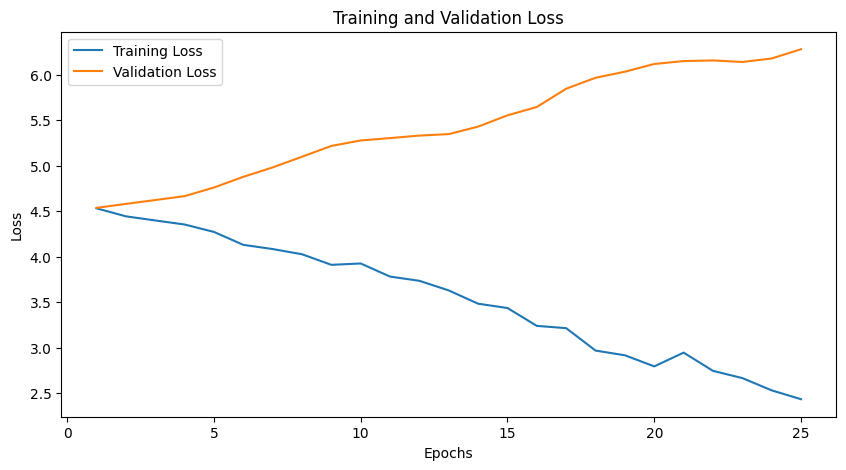

In [ ]:
# Define paths
train_data_dir = '/content/processed_data/train'
val_data_dir = '/content/processed_data/val'
test_data_dir = '/content/processed_data/test'
label_mapping_path = '/content/processed_data/label_mapping.json'

# Load the label mapping
with open(label_mapping_path, 'r') as f:
    label_mapping = json.load(f)

# Initialize the fully connected layers
input_dim = 768 * 2  # Adjust input_dim based on your feature size
num_classes = len(label_mapping)  # Use the length of the label mapping for number of classes
print(f"Number of classes: {num_classes}")
fc = FC(input_dim=input_dim, num_classes=num_classes)

# Initialize the combined model
combined_model = alphaModel(TimeSformer=model, AST=audio_model, linear=fc, exp="TimeSformer", option="sqrt")
combined_model = combined_model.cuda()  # Move the model to GPU

# Define the loss function and optimizer
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(combined_model.linear.parameters(), lr=1e-4)  # Only pass the parameters of the FC layers to the optimizer

# DataLoaders
batch_size = 8  # Adjust based on your GPU memory capacity
train_loader = DataLoader(VGGSound(train_data_dir, label_mapping), batch_size=batch_size, shuffle=True)
val_loader = DataLoader(VGGSound(val_data_dir, label_mapping), batch_size=batch_size, shuffle=False)
test_loader = DataLoader(VGGSound(test_data_dir, label_mapping), batch_size=batch_size, shuffle=False)

# Train the model
num_epochs = 25
trained_model, train_losses, val_losses = train_model(combined_model, train_loader, val_loader, criterion, optimizer, num_epochs)

# Validate the model
val_loss, val_accuracy = evaluate_model(trained_model, val_loader, criterion)

# Test the model
test_loss, test_accuracy = test_model(trained_model, test_loader, criterion)

# Save the trained model
torch.save(trained_model.state_dict(), 'alpha_model_1.pth')

# Plot the training and validation losses
plt.figure(figsize=(10, 5))
plt.plot(range(1, num_epochs+1), train_losses, label='Training Loss')
plt.plot(range(1, num_epochs+1), val_losses, label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training and Validation Loss')
plt.legend()
plt.show()

**Experiment 2: The features of the TimeSormer are multiplied by the positive scalar 1.5 before concatenation placing a smaller focus on the audio.**

Number of classes: 91

Batch 1/11
Video shape: torch.Size([8, 3, 8, 224, 224]), Audio shape: torch.Size([8, 128, 1024]), Labels shape: torch.Size([8])
Outputs shape: torch.Size([8, 91])
Loss: 4.4835429191589355

Batch 2/11
Video shape: torch.Size([8, 3, 8, 224, 224]), Audio shape: torch.Size([8, 128, 1024]), Labels shape: torch.Size([8])
Outputs shape: torch.Size([8, 91])
Loss: 4.538994312286377

Batch 3/11
Video shape: torch.Size([8, 3, 8, 224, 224]), Audio shape: torch.Size([8, 128, 1024]), Labels shape: torch.Size([8])
Outputs shape: torch.Size([8, 91])
Loss: 4.645646095275879

Batch 4/11
Video shape: torch.Size([8, 3, 8, 224, 224]), Audio shape: torch.Size([8, 128, 1024]), Labels shape: torch.Size([8])
Outputs shape: torch.Size([8, 91])
Loss: 4.655134201049805

Batch 5/11
Video shape: torch.Size([8, 3, 8, 224, 224]), Audio shape: torch.Size([8, 128, 1024]), Labels shape: torch.Size([8])
Outputs shape: torch.Size([8, 91])
Loss: 4.552698612213135

Batch 6/11
Video shape: torch.Size([

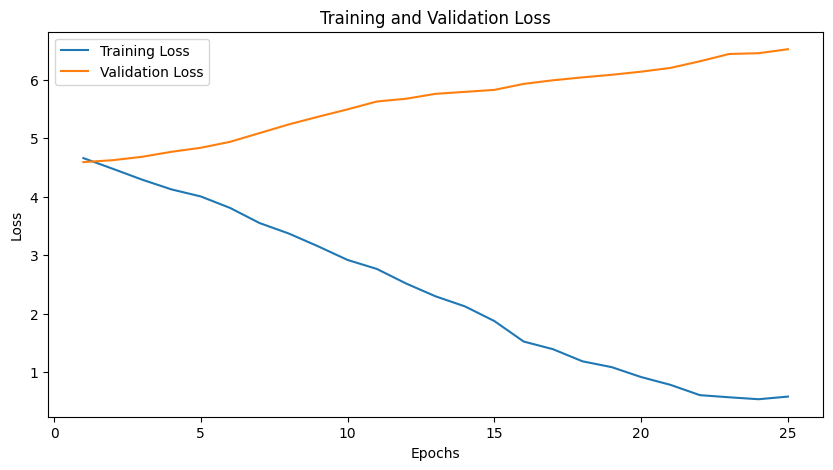

In [ ]:
# Define paths
train_data_dir = '/content/processed_data/train'
val_data_dir = '/content/processed_data/val'
test_data_dir = '/content/processed_data/test'
label_mapping_path = '/content/processed_data/label_mapping.json'

# Load the label mapping
with open(label_mapping_path, 'r') as f:
    label_mapping = json.load(f)

# Initialize the fully connected layers
input_dim = 768 * 2  # Adjust input_dim based on your feature size
num_classes = len(label_mapping)  # Use the length of the label mapping for number of classes
print(f"Number of classes: {num_classes}")
fc = FC(input_dim=input_dim, num_classes=num_classes)

# Initialize the combined model
combined_model = alphaModel(TimeSformer=model, AST=audio_model, linear=fc, exp="TimeSformer", option="pos_scalar")
combined_model = combined_model.cuda()  # Move the model to GPU

# Define the loss function and optimizer
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(combined_model.linear.parameters(), lr=1e-4)  # Only pass the parameters of the FC layers to the optimizer

# DataLoaders
batch_size = 8  # Adjust based on your GPU memory capacity
train_loader = DataLoader(VGGSound(train_data_dir, label_mapping), batch_size=batch_size, shuffle=True)
val_loader = DataLoader(VGGSound(val_data_dir, label_mapping), batch_size=batch_size, shuffle=False)
test_loader = DataLoader(VGGSound(test_data_dir, label_mapping), batch_size=batch_size, shuffle=False)

# Train the model
num_epochs = 25
trained_model, train_losses, val_losses = train_model(combined_model, train_loader, val_loader, criterion, optimizer, num_epochs)

# Validate the model
val_loss, val_accuracy = evaluate_model(trained_model, val_loader, criterion)

# Test the model
test_loss, test_accuracy = test_model(trained_model, test_loader, criterion)

# Save the trained model
torch.save(trained_model.state_dict(), 'alpha_model_2.pth')

# Plot the training and validation losses
plt.figure(figsize=(10, 5))
plt.plot(range(1, num_epochs+1), train_losses, label='Training Loss')
plt.plot(range(1, num_epochs+1), val_losses, label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training and Validation Loss')
plt.legend()
plt.show()

**Experiment 3: The features of the TimeSormer are multiplied by the smaller scalar 0.5 before concatenation placing a larger on the audio.**

Number of classes: 91

Batch 1/11
Video shape: torch.Size([8, 3, 8, 224, 224]), Audio shape: torch.Size([8, 128, 1024]), Labels shape: torch.Size([8])
Outputs shape: torch.Size([8, 91])
Loss: 4.5286970138549805

Batch 2/11
Video shape: torch.Size([8, 3, 8, 224, 224]), Audio shape: torch.Size([8, 128, 1024]), Labels shape: torch.Size([8])
Outputs shape: torch.Size([8, 91])
Loss: 4.6238298416137695

Batch 3/11
Video shape: torch.Size([8, 3, 8, 224, 224]), Audio shape: torch.Size([8, 128, 1024]), Labels shape: torch.Size([8])
Outputs shape: torch.Size([8, 91])
Loss: 4.4831953048706055

Batch 4/11
Video shape: torch.Size([8, 3, 8, 224, 224]), Audio shape: torch.Size([8, 128, 1024]), Labels shape: torch.Size([8])
Outputs shape: torch.Size([8, 91])
Loss: 4.421402454376221

Batch 5/11
Video shape: torch.Size([8, 3, 8, 224, 224]), Audio shape: torch.Size([8, 128, 1024]), Labels shape: torch.Size([8])
Outputs shape: torch.Size([8, 91])
Loss: 4.51127290725708

Batch 6/11
Video shape: torch.Size(

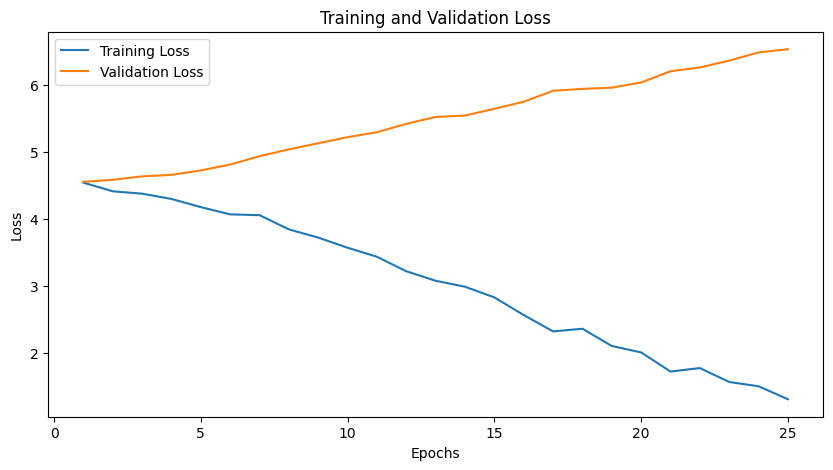

In [ ]:
# Define paths
train_data_dir = '/content/processed_data/train'
val_data_dir = '/content/processed_data/val'
test_data_dir = '/content/processed_data/test'
label_mapping_path = '/content/processed_data/label_mapping.json'

# Load the label mapping
with open(label_mapping_path, 'r') as f:
    label_mapping = json.load(f)

# Initialize the fully connected layers
input_dim = 768 * 2  # Adjust input_dim based on your feature size
num_classes = len(label_mapping)  # Use the length of the label mapping for number of classes
print(f"Number of classes: {num_classes}")
fc = FC(input_dim=input_dim, num_classes=num_classes)

# Initialize the combined model
combined_model = alphaModel(TimeSformer=model, AST=audio_model, linear=fc, exp="TimeSformer", option="neg_scalar")
combined_model = combined_model.cuda()  # Move the model to GPU

# Define the loss function and optimizer
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(combined_model.linear.parameters(), lr=1e-4)  # Only pass the parameters of the FC layers to the optimizer

# DataLoaders
batch_size = 8  # Adjust based on your GPU memory capacity
train_loader = DataLoader(VGGSound(train_data_dir, label_mapping), batch_size=batch_size, shuffle=True)
val_loader = DataLoader(VGGSound(val_data_dir, label_mapping), batch_size=batch_size, shuffle=False)
test_loader = DataLoader(VGGSound(test_data_dir, label_mapping), batch_size=batch_size, shuffle=False)

# Train the model
num_epochs = 25
trained_model, train_losses, val_losses = train_model(combined_model, train_loader, val_loader, criterion, optimizer, num_epochs)

# Validate the model
val_loss, val_accuracy = evaluate_model(trained_model, val_loader, criterion)

# Test the model
test_loss, test_accuracy = test_model(trained_model, test_loader, criterion)

# Save the trained model
torch.save(trained_model.state_dict(), 'alpha_model_3.pth')

# Plot the training and validation losses
plt.figure(figsize=(10, 5))
plt.plot(range(1, num_epochs+1), train_losses, label='Training Loss')
plt.plot(range(1, num_epochs+1), val_losses, label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training and Validation Loss')
plt.legend()
plt.show()

**Experiment 4: The features of the AST are square rooted before concatenation placing a greater focus on the visual data.**

Number of classes: 91

Batch 1/11
Video shape: torch.Size([8, 3, 8, 224, 224]), Audio shape: torch.Size([8, 128, 1024]), Labels shape: torch.Size([8])
Outputs shape: torch.Size([8, 91])
Loss: 4.5875630378723145

Batch 2/11
Video shape: torch.Size([8, 3, 8, 224, 224]), Audio shape: torch.Size([8, 128, 1024]), Labels shape: torch.Size([8])
Outputs shape: torch.Size([8, 91])
Loss: 4.461893558502197

Batch 3/11
Video shape: torch.Size([8, 3, 8, 224, 224]), Audio shape: torch.Size([8, 128, 1024]), Labels shape: torch.Size([8])
Outputs shape: torch.Size([8, 91])
Loss: 4.53766393661499

Batch 4/11
Video shape: torch.Size([8, 3, 8, 224, 224]), Audio shape: torch.Size([8, 128, 1024]), Labels shape: torch.Size([8])
Outputs shape: torch.Size([8, 91])
Loss: 4.55256986618042

Batch 5/11
Video shape: torch.Size([8, 3, 8, 224, 224]), Audio shape: torch.Size([8, 128, 1024]), Labels shape: torch.Size([8])
Outputs shape: torch.Size([8, 91])
Loss: 4.504446983337402

Batch 6/11
Video shape: torch.Size([8,

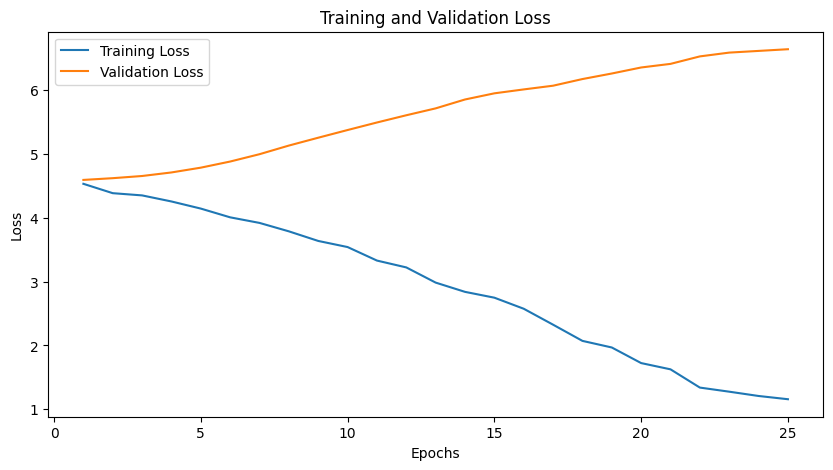

In [ ]:
# Define paths
train_data_dir = '/content/processed_data/train'
val_data_dir = '/content/processed_data/val'
test_data_dir = '/content/processed_data/test'
label_mapping_path = '/content/processed_data/label_mapping.json'

# Load the label mapping
with open(label_mapping_path, 'r') as f:
    label_mapping = json.load(f)

# Initialize the fully connected layers
input_dim = 768 * 2  # Adjust input_dim based on your feature size
num_classes = len(label_mapping)  # Use the length of the label mapping for number of classes
print(f"Number of classes: {num_classes}")
fc = FC(input_dim=input_dim, num_classes=num_classes)

# Initialize the combined model
combined_model = alphaModel(TimeSformer=model, AST=audio_model, linear=fc, exp="AST", option="sqrt")
combined_model = combined_model.cuda()  # Move the model to GPU

# Define the loss function and optimizer
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(combined_model.linear.parameters(), lr=1e-4)  # Only pass the parameters of the FC layers to the optimizer

# DataLoaders
batch_size = 8  # Adjust based on your GPU memory capacity
train_loader = DataLoader(VGGSound(train_data_dir, label_mapping), batch_size=batch_size, shuffle=True)
val_loader = DataLoader(VGGSound(val_data_dir, label_mapping), batch_size=batch_size, shuffle=False)
test_loader = DataLoader(VGGSound(test_data_dir, label_mapping), batch_size=batch_size, shuffle=False)

# Train the model
num_epochs = 25
trained_model, train_losses, val_losses = train_model(combined_model, train_loader, val_loader, criterion, optimizer, num_epochs)

# Validate the model
val_loss, val_accuracy = evaluate_model(trained_model, val_loader, criterion)

# Test the model
test_loss, test_accuracy = test_model(trained_model, test_loader, criterion)

# Save the trained model
torch.save(trained_model.state_dict(), 'alpha_model_4.pth')

# Plot the training and validation losses
plt.figure(figsize=(10, 5))
plt.plot(range(1, num_epochs+1), train_losses, label='Training Loss')
plt.plot(range(1, num_epochs+1), val_losses, label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training and Validation Loss')
plt.legend()
plt.show()

**Experiment 5: The features of the AST are multiplied by the positive scalar 1.5 before concatenation placing a smaller focus on the video.**

Number of classes: 91

Batch 1/11
Video shape: torch.Size([8, 3, 8, 224, 224]), Audio shape: torch.Size([8, 128, 1024]), Labels shape: torch.Size([8])
Outputs shape: torch.Size([8, 91])
Loss: 4.678421974182129

Batch 2/11
Video shape: torch.Size([8, 3, 8, 224, 224]), Audio shape: torch.Size([8, 128, 1024]), Labels shape: torch.Size([8])
Outputs shape: torch.Size([8, 91])
Loss: 4.348304271697998

Batch 3/11
Video shape: torch.Size([8, 3, 8, 224, 224]), Audio shape: torch.Size([8, 128, 1024]), Labels shape: torch.Size([8])
Outputs shape: torch.Size([8, 91])
Loss: 4.490671157836914

Batch 4/11
Video shape: torch.Size([8, 3, 8, 224, 224]), Audio shape: torch.Size([8, 128, 1024]), Labels shape: torch.Size([8])
Outputs shape: torch.Size([8, 91])
Loss: 4.397071838378906

Batch 5/11
Video shape: torch.Size([8, 3, 8, 224, 224]), Audio shape: torch.Size([8, 128, 1024]), Labels shape: torch.Size([8])
Outputs shape: torch.Size([8, 91])
Loss: 4.60115909576416

Batch 6/11
Video shape: torch.Size([8,

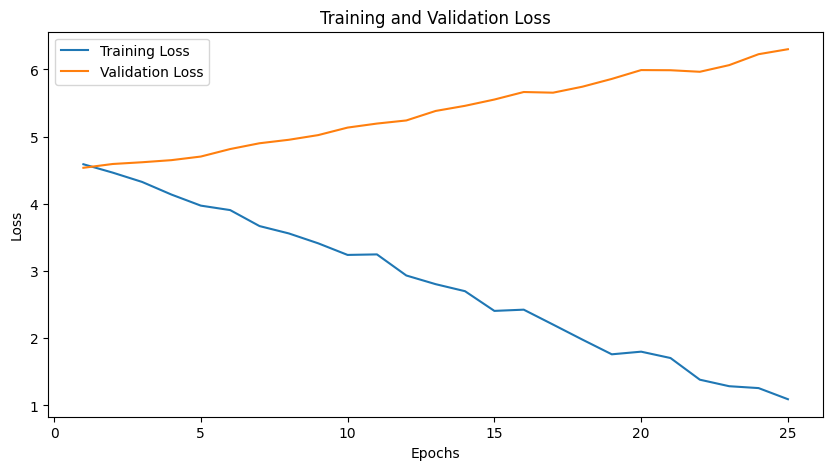

In [ ]:
# Define paths
train_data_dir = '/content/processed_data/train'
val_data_dir = '/content/processed_data/val'
test_data_dir = '/content/processed_data/test'
label_mapping_path = '/content/processed_data/label_mapping.json'

# Load the label mapping
with open(label_mapping_path, 'r') as f:
    label_mapping = json.load(f)

# Initialize the fully connected layers
input_dim = 768 * 2  # Adjust input_dim based on your feature size
num_classes = len(label_mapping)  # Use the length of the label mapping for number of classes
print(f"Number of classes: {num_classes}")
fc = FC(input_dim=input_dim, num_classes=num_classes)

# Initialize the combined model
combined_model = alphaModel(TimeSformer=model, AST=audio_model, linear=fc, exp="AST", option="pos_scalar")
combined_model = combined_model.cuda()  # Move the model to GPU

# Define the loss function and optimizer
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(combined_model.linear.parameters(), lr=1e-4)  # Only pass the parameters of the FC layers to the optimizer

# DataLoaders
batch_size = 8  # Adjust based on your GPU memory capacity
train_loader = DataLoader(VGGSound(train_data_dir, label_mapping), batch_size=batch_size, shuffle=True)
val_loader = DataLoader(VGGSound(val_data_dir, label_mapping), batch_size=batch_size, shuffle=False)
test_loader = DataLoader(VGGSound(test_data_dir, label_mapping), batch_size=batch_size, shuffle=False)

# Train the model
num_epochs = 25
trained_model, train_losses, val_losses = train_model(combined_model, train_loader, val_loader, criterion, optimizer, num_epochs)

# Validate the model
val_loss, val_accuracy = evaluate_model(trained_model, val_loader, criterion)

# Test the model
test_loss, test_accuracy = test_model(trained_model, test_loader, criterion)

# Save the trained model
torch.save(trained_model.state_dict(), 'alpha_model_5.pth')

# Plot the training and validation losses
plt.figure(figsize=(10, 5))
plt.plot(range(1, num_epochs+1), train_losses, label='Training Loss')
plt.plot(range(1, num_epochs+1), val_losses, label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training and Validation Loss')
plt.legend()
plt.show()

**Experiment 6: The features of the AST are multiplied by the smaller scalar 0.5 before concatenation placing a larger on the visual data.**

Number of classes: 91

Batch 1/11
Video shape: torch.Size([8, 3, 8, 224, 224]), Audio shape: torch.Size([8, 128, 1024]), Labels shape: torch.Size([8])
Outputs shape: torch.Size([8, 91])
Loss: 4.597344398498535

Batch 2/11
Video shape: torch.Size([8, 3, 8, 224, 224]), Audio shape: torch.Size([8, 128, 1024]), Labels shape: torch.Size([8])
Outputs shape: torch.Size([8, 91])
Loss: 4.648617267608643

Batch 3/11
Video shape: torch.Size([8, 3, 8, 224, 224]), Audio shape: torch.Size([8, 128, 1024]), Labels shape: torch.Size([8])
Outputs shape: torch.Size([8, 91])
Loss: 4.487429618835449

Batch 4/11
Video shape: torch.Size([8, 3, 8, 224, 224]), Audio shape: torch.Size([8, 128, 1024]), Labels shape: torch.Size([8])
Outputs shape: torch.Size([8, 91])
Loss: 4.387433052062988

Batch 5/11
Video shape: torch.Size([8, 3, 8, 224, 224]), Audio shape: torch.Size([8, 128, 1024]), Labels shape: torch.Size([8])
Outputs shape: torch.Size([8, 91])
Loss: 4.56691837310791

Batch 6/11
Video shape: torch.Size([8,

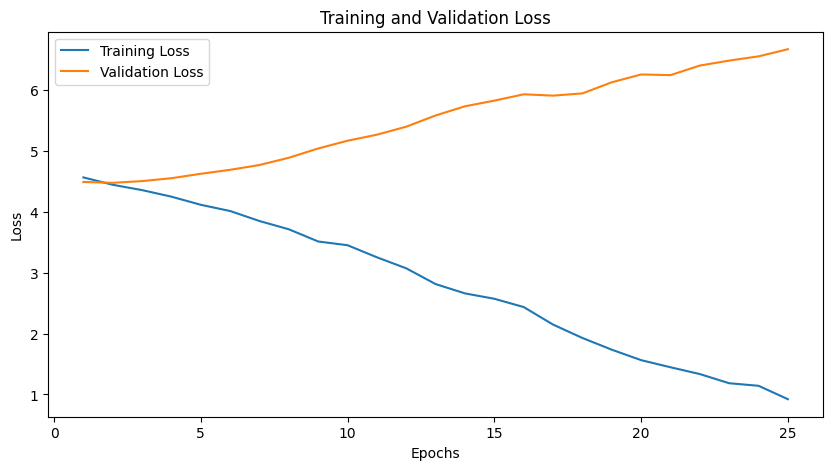

In [ ]:
# Define paths
train_data_dir = '/content/processed_data/train'
val_data_dir = '/content/processed_data/val'
test_data_dir = '/content/processed_data/test'
label_mapping_path = '/content/processed_data/label_mapping.json'

# Load the label mapping
with open(label_mapping_path, 'r') as f:
    label_mapping = json.load(f)

# Initialize the fully connected layers
input_dim = 768 * 2  # Adjust input_dim based on your feature size
num_classes = len(label_mapping)  # Use the length of the label mapping for number of classes
print(f"Number of classes: {num_classes}")
fc = FC(input_dim=input_dim, num_classes=num_classes)

# Initialize the combined model
combined_model = alphaModel(TimeSformer=model, AST=audio_model, linear=fc, exp="AST", option="neg_scalar")
combined_model = combined_model.cuda()  # Move the model to GPU

# Define the loss function and optimizer
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(combined_model.linear.parameters(), lr=1e-4)  # Only pass the parameters of the FC layers to the optimizer

# DataLoaders
batch_size = 8  # Adjust based on your GPU memory capacity
train_loader = DataLoader(VGGSound(train_data_dir, label_mapping), batch_size=batch_size, shuffle=True)
val_loader = DataLoader(VGGSound(val_data_dir, label_mapping), batch_size=batch_size, shuffle=False)
test_loader = DataLoader(VGGSound(test_data_dir, label_mapping), batch_size=batch_size, shuffle=False)

# Train the model
num_epochs = 25
trained_model, train_losses, val_losses = train_model(combined_model, train_loader, val_loader, criterion, optimizer, num_epochs)

# Validate the model
val_loss, val_accuracy = evaluate_model(trained_model, val_loader, criterion)

# Test the model
test_loss, test_accuracy = test_model(trained_model, test_loader, criterion)

# Save the trained model
torch.save(trained_model.state_dict(), 'alpha_model_6.pth')

# Plot the training and validation losses
plt.figure(figsize=(10, 5))
plt.plot(range(1, num_epochs+1), train_losses, label='Training Loss')
plt.plot(range(1, num_epochs+1), val_losses, label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training and Validation Loss')
plt.legend()
plt.show()